In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a61fb5ae-22d6-428f-bd8b-507d788b88e8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
    
    if not os.path.isfile(r'C:\Users\SHREYA\Downloads\Python Project\Crypto.csv'):
        df.to_csv(r'C:\Users\SHREYA\Downloads\Python Project\Crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\SHREYA\Downloads\Python Project\Crypto.csv', mode = 'a', header = False)

In [7]:
import os
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API runner completed!')
    sleep(3)
exit()

API runner completed!
API runner completed!
API runner completed!


KeyboardInterrupt: 

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df2 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [12]:
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.04928,-0.52996,-1.11412,13.40600,11.75979,2.35102
Ethereum,0.10040,-0.64167,1.97419,10.09455,5.40619,-4.58013
Tether,0.00615,-0.00619,0.00761,0.03670,0.00588,-0.00651
XRP,1.59754,1.87796,60.98334,56.89223,64.35947,52.46580
BNB,0.00445,-0.92171,-1.64675,-1.38515,-21.85462,-26.67872
USD Coin,0.01002,0.01264,-0.00020,-0.01065,0.00667,0.01766
Cardano,0.21092,-1.39885,6.89125,16.85307,-15.99328,-26.64084
Solana,-0.08560,-4.91046,18.83352,64.90891,26.79873,10.40882
Dogecoin,0.03840,-0.81026,6.68140,11.33667,-5.80586,-22.39625


In [13]:
df3 = df2.stack()
df3

name                                         
Bitcoin          quote.USD.percent_change_1h      0.04928
                 quote.USD.percent_change_24h    -0.52996
                 quote.USD.percent_change_7d     -1.11412
                 quote.USD.percent_change_30d    13.40600
                 quote.USD.percent_change_60d    11.75979
                 quote.USD.percent_change_90d     2.35102
Ethereum         quote.USD.percent_change_1h      0.10040
                 quote.USD.percent_change_24h    -0.64167
                 quote.USD.percent_change_7d      1.97419
                 quote.USD.percent_change_30d    10.09455
                 quote.USD.percent_change_60d     5.40619
                 quote.USD.percent_change_90d    -4.58013
Tether           quote.USD.percent_change_1h      0.00615
                 quote.USD.percent_change_24h    -0.00619
                 quote.USD.percent_change_7d      0.00761
                 quote.USD.percent_change_30d     0.03670
                 quote.USD

In [14]:
type(df3)

pandas.core.series.Series

In [15]:
df4 =df3.to_frame(name = 'values')
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.04928
                quote.USD.percent_change_24h  -0.52996
                quote.USD.percent_change_7d   -1.11412
                quote.USD.percent_change_30d  13.40600
                quote.USD.percent_change_60d  11.75979
                quote.USD.percent_change_90d   2.35102
Ethereum        quote.USD.percent_change_1h    0.10040
                quote.USD.percent_change_24h  -0.64167
                quote.USD.percent_change_7d    1.97419
                quote.USD.percent_change_30d  10.09455
                quote.USD.percent_change_60d   5.40619
                quote.USD.percent_change_90d  -4.58013
Tether          quote.USD.percent_change_1h    0.00615
                quote.USD.percent_change_24h  -0.00619
                quote.USD.percent_change_7d    0.00761
                quote.USD.percent_change_30d   0.03670
                quote.USD.percent_change_60d   0.00588
                quote.USD.percent_change_90d  -0.00651
XRP             quote.USD.percent_change_1h    1.59754
                quote.USD.percent_change_24h   1.87796
                quote.USD.percent_change_7d   60.98334
                quote.USD.percent_change_30d  56.89223
                quote.USD.percent_change_60d  64.35947
                quote.USD.percent_change_90d  52.46580
BNB             quote.USD.percent_change_1h    0.00445
                quote.USD.percent_change_24h  -0.92171
                quote.USD.percent_change_7d   -1.64675
                quote.USD.percent_change_30d  -1.38515
                quote.USD.percent_change_60d -21.85462
                quote.USD.percent_change_90d -26.67872
USD Coin        quote.USD.percent_change_1h    0.01002
                quote.USD.percent_change_24h   0.01264
                quote.USD.percent_change_7d   -0.00020
                quote.USD.percent_change_30d  -0.01065
                quote.USD.percent_change_60d   0.00667
                quote.USD.percent_change_90d   0.01766
Cardano         quote.USD.percent_change_1h    0.21092
                quote.USD.percent_change_24h  -1.39885
                quote.USD.percent_change_7d    6.89125
                quote.USD.percent_change_30d  16.85307
                quote.USD.percent_change_60d -15.99328
                quote.USD.percent_change_90d -26.64084
Solana          quote.USD.percent_change_1h   -0.08560
                quote.USD.percent_change_24h  -4.91046
                quote.USD.percent_change_7d   18.83352
                quote.USD.percent_change_30d  64.90891
                quote.USD.percent_change_60d  26.79873
                quote.USD.percent_change_90d  10.40882
Dogecoin        quote.USD.percent_change_1h    0.03840
                quote.USD.percent_change_24h  -0.81026
                quote.USD.percent_change_7d    6.68140
                quote.USD.percent_change_30d  11.33667
                quote.USD.percent_change_60d  -5.80586
                quote.USD.percent_change_90d -22.39625
Polygon         quote.USD.percent_change_1h    0.05781
                quote.USD.percent_change_24h  -1.36515
                quote.USD.percent_change_7d    4.01930
                quote.USD.percent_change_30d  24.67756
                quote.USD.percent_change_60d -12.39207
                quote.USD.percent_change_90d -31.98585
TRON            quote.USD.percent_change_1h   -0.01484
                quote.USD.percent_change_24h   0.45008
                quote.USD.percent_change_7d    3.66918
                quote.USD.percent_change_30d  13.64900
                quote.USD.percent_change_60d  13.44702
                quote.USD.percent_change_90d  21.55831
Litecoin        quote.USD.percent_change_1h    0.22017
                quote.USD.percent_change_24h  -0.31727
                quote.USD.percent_change_7d   -5.43489
                quote.USD.percent_change_30d  19.04863
                quote.USD.percent_change_60d   0.54089
                quote.USD.percent

In [16]:
type(df4)

pandas.core.frame.DataFrame

In [17]:
df4.count()

values    102
dtype: int64

In [18]:
index = pd.Index(range(102))

In [19]:
df5 = df4.set_index(index)


In [20]:
df5 = df4.reset_index()

In [21]:
df5 = df5.rename(columns = {'level_1':'percent_change'})

In [22]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

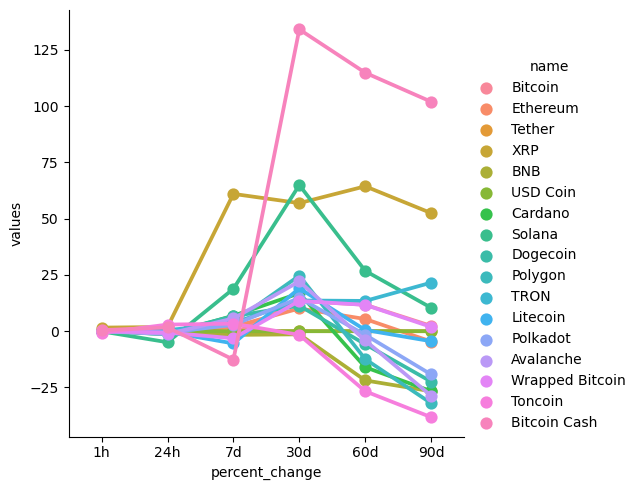

In [24]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df5, kind = 'point')